## marketing_campaign.csv

### Customer Personality Analysis: 고객 특성 분석
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### 변수 정보

People 

* ID: Customer's unique identifier : 고객번호
* Year_Birth: Customer's birth year  : 출생연도
* Education: Customer's education level  : 교육수준, 학력
* Marital_Status: Customer's marital status  : 결혼 상태
* Income: Customer's yearly household income  : 가구 소득
* Kidhome: Number of children in customer's household  : 자녀 수
* Teenhome: Number of teenagers in customer's household  : 청소년 자녀 수
* Dt_Customer: Date of customer's enrollment with the company  : 고객 회사 등록 날짜
* Recency: Number of days since customer's last purchase  : 고객의 마지막 구매 이후 일 수
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise  : 지난 2년간 고객의 컴플레인 여부(한 경우 1, 아니면 0)

Products 

* MntWines: Amount spent on wine in last 2 years  : 지난 2년 와인 지출 비용
* MntFruits: Amount spent on fruits in last 2 years  : 지난 2년 과일 지출 비용
* MntMeatProducts: Amount spent on meat in last 2 years  : 지난 2년 육류 지출 비용
* MntFishProducts: Amount spent on fish in last 2 years  : 지난 2년 생선류 지출 비용
* MntSweetProducts: Amount spent on sweets in last 2 years  : 지난 2년 간식 지출 비용
* MntGoldProds: Amount spent on gold in last 2 years  : 지난 2년간 금 지출 비용


Promotion

* NumDealsPurchases: Number of purchases made with a discount  : 할인일 때 구매한 횟수
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  : 첫 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  : 두 번재 캠페인에서 제안 수락한 경우 1,  그 외 0
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  : 세 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  : 네 번째 캠페인에서 제안 수락한 경우 1,  그 외 0
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  : 다섯 번째 캠페인에서 제안 수락한 경우 1,  그 외 0
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  : 마지막 캠페인에서 제안 수락한 경우 1,  그 외 0

Place

* NumWebPurchases: Number of purchases made through the company’s website : 웹사이트를 통해 구매한 횟수
* NumCatalogPurchases: Number of purchases made using a catalogue : 카탈로그를 통해 구매한 횟수
* NumStorePurchases: Number of purchases made directly in stores : 가게에서 구매한 횟수
* NumWebVisitsMonth: Number of visits to company’s website in the last month : 지난 달 웹사이트를 방문수

### Target

In [ ]:
Need to perform clustering to summarize customer segments.

### 데이터 확인

In [3]:
# 모듈 불러오기

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import nan 
from sklearn.impute import SimpleImputer

In [4]:
# 데이터 불러오기

market_df = pd.read_csv("marketing_campaign.csv")
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 중복된 데이터 확인

In [5]:
market_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [6]:
# 중복 데이터 없음

market_df[market_df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### 이상치

In [ ]:
market_df.boxplot()

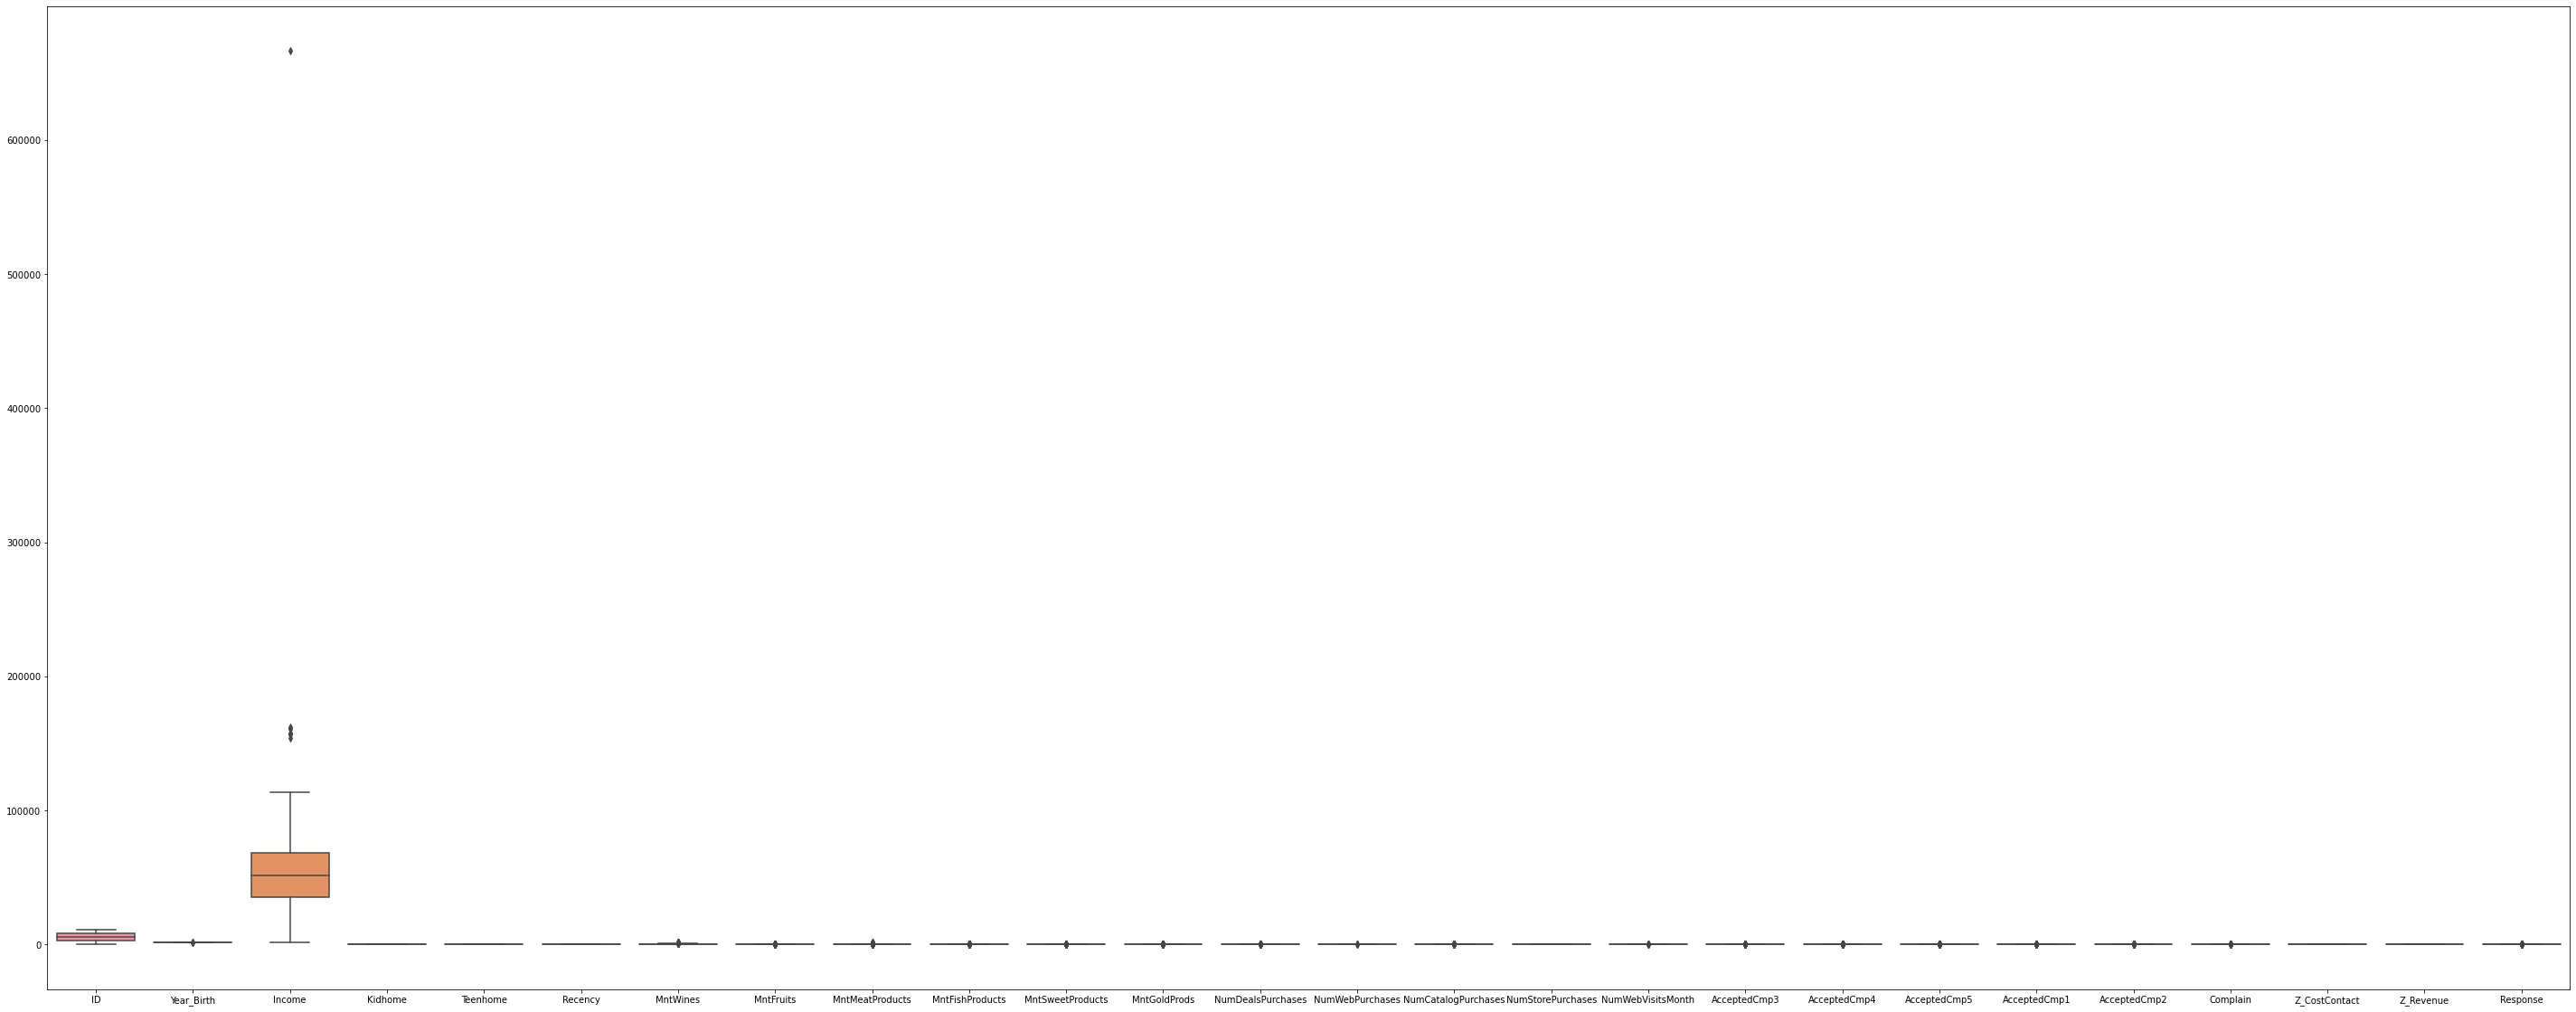

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 세로 그래프
plt.figure(figsize = (50, 20))
sns.boxplot(data = market_df)
plt.show()

# income에 이상치 존재

In [ ]:
# 이상치 제거

### 결측치 처리

In [7]:
# 결측치 확인하기

market_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# 결측치 확인하기

market_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# 결측치 처리
# 0으로 표시된 결측치를 NaN 형태로 변경

market2_df = market_df.copy()

market2_df['Income'] = market2_df['Income'].replace(0, nan)

In [87]:
market2_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 상관관계

In [59]:
market2_df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


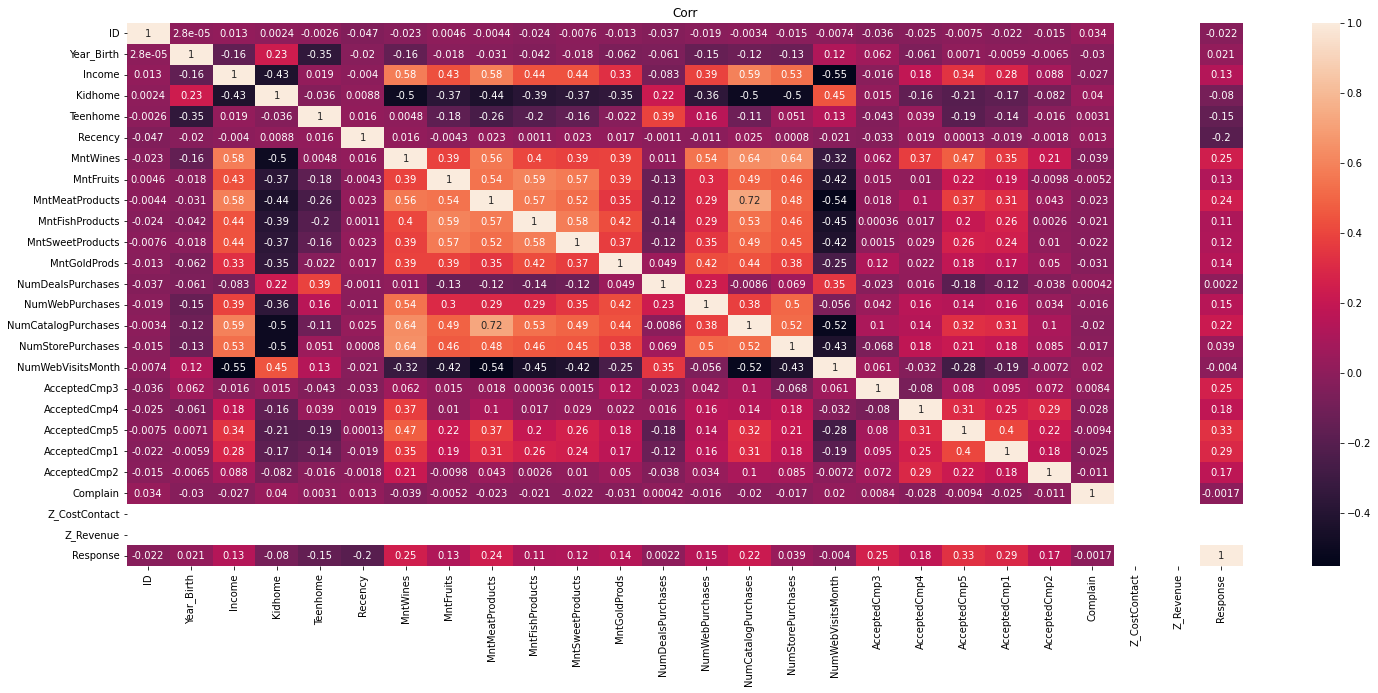

In [61]:
plt.figure(figsize=(25,10))
plt.title('Corr')
sns.heatmap(market2_df.corr(), annot=True);

### 가변수 변환

In [88]:
market2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# Education, Marital_Status, Dt_Customer , 
# 범주 확인
print(market2_df['Education'].unique())
print(market2_df['Marital_Status'].unique())
print(market2_df['Dt_Customer'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06-12-2013' '21-05-2013' '11-05-2014'
 '19-03-2014' '27-09-2013' '08-04-2013' '11-09-2012' '14-09-2012'
 '17-03-2013' '05-

In [11]:
# 범주 개수
print(market2_df['Education'].nunique())
print(market2_df['Marital_Status'].nunique())
print(market2_df['Dt_Customer'].nunique())

# Education, Marital_Status 만 가변수 변환

5
8
663


In [12]:
# 더미변수 변환
# Education, Marital_Status,
market3_df = pd.get_dummies(market2_df, columns = ['Education', 'Marital_Status'])

In [13]:
print(market3_df.info())
market3_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Year_Birth               2240 non-null   int64  
 2   Income                   2216 non-null   float64
 3   Kidhome                  2240 non-null   int64  
 4   Teenhome                 2240 non-null   int64  
 5   Dt_Customer              2240 non-null   object 
 6   Recency                  2240 non-null   int64  
 7   MntWines                 2240 non-null   int64  
 8   MntFruits                2240 non-null   int64  
 9   MntMeatProducts          2240 non-null   int64  
 10  MntFishProducts          2240 non-null   int64  
 11  MntSweetProducts         2240 non-null   int64  
 12  MntGoldProds             2240 non-null   int64  
 13  NumDealsPurchases        2240 non-null   int64  
 14  NumWebPurchases         

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,19-01-2014,94,173,43,118,...,0,1,0,0,0,1,0,0,0,0


### Dt_Customer - datetime

In [14]:
# 결측치 대체 시, Dt_Customer 변수로 인해 오류 발생
# ValueError: Cannot use mean strategy with non-numeric data: could not convert string to float: '04-09-2012'

# Dt_Customer 데이터 전처리

# 시간형식의 object 자료형 column을 datetime형식으로 바꾸기

In [15]:
market3_df['Dt_Customer'] = pd.to_datetime(market3_df['Dt_Customer'])

In [16]:
# 시간 정보 추출
# https://jimmy-ai.tistory.com/156

market3_df['Dt_Customer'].dt.year # 연도 정보
market3_df['Dt_Customer'].dt.month # 월 정보
market3_df['Dt_Customer'].dt.day # 일 정보

0        9
1        3
2       21
3        2
4       19
        ..
2235    13
2236     6
2237    25
2238    24
2239    15
Name: Dt_Customer, Length: 2240, dtype: int64

In [17]:
Dt_Year = market3_df['Dt_Customer'].dt.year # 연도 정보
Dt_Year

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2240, dtype: int64

In [18]:
Dt_Month = market3_df['Dt_Customer'].dt.month # 월 정보
Dt_Month

0        4
1        8
2        8
3       10
4        1
        ..
2235     6
2236    10
2237     1
2238     1
2239    10
Name: Dt_Customer, Length: 2240, dtype: int64

### 추가변수, 파생변수

* Dt_Customer 열 삭제, 추가
* 연도변수, 월 변수 추가

In [19]:
# 열 삭제
market4_df = market3_df.drop(['Dt_Customer'], axis = 1)
market4_df

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,1,0,0,0,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,0,0,0,1,0,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,1,0,0,0,0,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,1,0,0,0,0,0,0,1,0,0


In [20]:
# 열 추가 (axis = 1)
market4_df = pd.concat([market4_df, Dt_Year], axis = 1)
market4_df 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Dt_Customer
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,0,0,0,2012
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,1,0,0,0,2014
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,1,0,0,2013
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,1,0,0,2014
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,1,0,0,0,1,0,0,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,1,0,0,0,0,2013
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,1,0,0,0,0,0,1,0,0,2014
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,0,0,1,0,0,0,0,0,2014
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,1,0,0,2014


In [50]:
# 열 이름 변경
# 기존 데이터프레임에 적용 (inplace = True)
market4_df.rename(columns = {'Dt_Customer':'Dt_Year'}, inplace = True)
market4_df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Dt_Year
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,0,0,0,2012
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,1,0,0,0,2014
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,1,0,0,2013
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,1,0,0,2014
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,1,0,0,0,1,0,0,0,0,2014


In [21]:
# 열 추가 (axis = 1)
market4_df = pd.concat([market4_df, Dt_Month], axis = 1)
market4_df 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Dt_Customer,Dt_Customer
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,0,0,0,2012,4
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,1,0,0,0,2014,8
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,1,0,0,2013,8
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,1,0,0,2014,10
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,0,0,1,0,0,0,0,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,0,0,1,0,0,0,0,2013,6
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,0,0,0,0,1,0,0,2014,10
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,0,1,0,0,0,0,0,2014,1
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,1,0,0,2014,1


### 추가변수: Dt_Year, Dt_Month 

In [22]:
# 열 이름 변경
# 기존 데이터프레임에 적용 (inplace = True)
market4_df.rename(columns = {'Dt_Customer':'Dt_Month'}, inplace = True)
market4_df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Dt_Month,Dt_Month
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,0,0,0,2012,4
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,1,0,0,0,2014,8
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,1,0,0,2013,8
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,1,0,0,2014,10
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,0,0,1,0,0,0,0,2014,1


In [31]:
# 열 이름 조회

market4_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Dt_Month', 'Dt_Month'],
      dtype='object')

### 결측치 처리(대치법) - SimpleImputer

In [49]:
values = market4_df.values
values

array([[5.5240e+03, 1.9570e+03, 5.8138e+04, ..., 0.0000e+00, 2.0120e+03,
        4.0000e+00],
       [2.1740e+03, 1.9540e+03, 4.6344e+04, ..., 0.0000e+00, 2.0140e+03,
        8.0000e+00],
       [4.1410e+03, 1.9650e+03, 7.1613e+04, ..., 0.0000e+00, 2.0130e+03,
        8.0000e+00],
       ...,
       [7.2700e+03, 1.9810e+03, 5.6981e+04, ..., 0.0000e+00, 2.0140e+03,
        1.0000e+00],
       [8.2350e+03, 1.9560e+03, 6.9245e+04, ..., 0.0000e+00, 2.0140e+03,
        1.0000e+00],
       [9.4050e+03, 1.9540e+03, 5.2869e+04, ..., 0.0000e+00, 2.0120e+03,
        1.0000e+01]])

In [50]:
from sklearn.impute import SimpleImputer

#simpleimputer: 모델을 만들어주는 함수. nan을 평균으로 대체해주는 모델을 생성.
imputer = SimpleImputer(missing_values = nan, strategy='mean')     # 중간값으로 대체하고 싶다면 strategy='median'

#위에서 만든 모델을 원래 데이터에 적합시킴
meanimputed = pd.DataFrame(imputer.fit_transform(values))

In [25]:
# 평균 대체 후 결측치 확인하기

meanimputed.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
dtype: int64

In [51]:
meanimputed

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2012.0,4.0
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014.0,8.0
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2013.0,8.0
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,10.0
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2014.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2013.0,6.0
2236,4001.0,1946.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,10.0
2237,7270.0,1981.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2014.0,1.0
2238,8235.0,1956.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,1.0


In [52]:
# 열 이름 조회

market4_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Dt_Month', 'Dt_Month'],
      dtype='object')

In [53]:
# meanimputed 열 이름 변경
# 기존 데이터프레임에 적용 (inplace = True)
meanimputed.rename(columns = {0:'ID', 1:'Year_Birth', 2:'Income', 3:'Kidhome', 4:'Teenhome',5:'Recency',
                             6:'MntWines', 7:'MntFruits', 8:'MntMeatProducts', 9:'MntFishProducts',
                             10:'MntSweetProducts', 11:'MntGoldProds', 12:'NumDealsPurchases',
                             13:'NumWebPurchases', 14:'NumCatalogPurchases', 15:'NumStorePurchases',
                             16:'NumWebVisitsMonth', 17:'AcceptedCmp3', 18:'AcceptedCmp4', 19: 'AcceptedCmp5'}, inplace = True)
meanimputed.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,31,32,33,34,35,36,37,38,39,40
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2012.0,4.0
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014.0,8.0
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2013.0,8.0
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,10.0
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2014.0,1.0


### 변수 삭제

In [40]:
# Z_CostContact = 모든 값이 3

meanimputed[23].value_counts()

3.0    2240
Name: 23, dtype: int64

In [41]:
# Z_Revenue = 모든 값이 11

meanimputed[24].value_counts()

11.0    2240
Name: 24, dtype: int64

In [54]:
meandrop =meanimputed.drop([23,24], axis=1)
meandrop

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,31,32,33,34,35,36,37,38,39,40
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2012.0,4.0
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014.0,8.0
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2013.0,8.0
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,10.0
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2014.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2013.0,6.0
2236,4001.0,1946.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,10.0
2237,7270.0,1981.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2014.0,1.0
2238,8235.0,1956.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,1.0


### 이상치 탐색 - 오류

In [60]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [61]:
outlier_iqr(market_df,'Income')

IQR은 nan 이다.
lower bound 값은 nan 이다.
upper bound 값은 nan 이다.
총 이상치 개수는 0 이다.


In [62]:
# 이상치 제외한 데이터 저장

data = market_df[(market_df['income'] < upper) & (market_df['income'] > lower)]
len(data)

KeyError: 'income'

In [ ]:
# 7.17
# income 24개 결측치 삭제하는 걸로
# 이상치 8개 지우고 나머지는 그대로
# 이상치 나이 120 이상 3개 삭제
# 이상치 mnt 나머지 그대로
# 추가변수: 총 지출금액, 나이, 자녀수


In [ ]:
# k-means 클러스터링